# Sentiment Analysis



#### 1. Data Analysis & Preprocessing
                                            

###### To import & understand the Dataset 

In [134]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'E:/DataScience&AI/DataScience/Projects/Sentiment Analysis/data/Reviews.csv')
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [135]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')

In [136]:
df['reviews.rating']

0       5.0
1       5.0
2       4.0
3       5.0
4       5.0
       ... 
1592    3.0
1593    1.0
1594    1.0
1595    3.0
1596    1.0
Name: reviews.rating, Length: 1597, dtype: float64

##

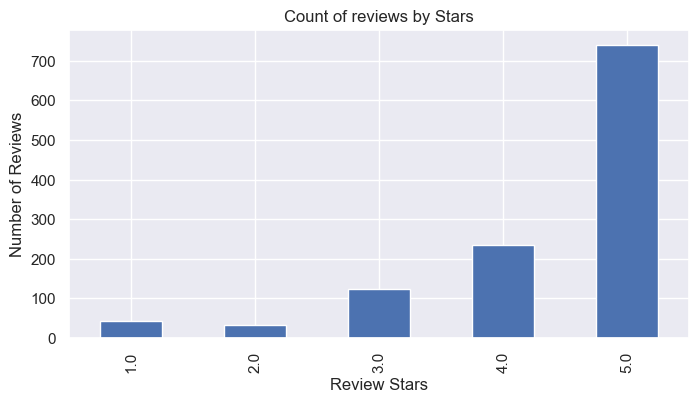

In [137]:
axis = df['reviews.rating'].value_counts().sort_index().plot(
    title='Count of reviews by Stars',
    kind='bar',
    figsize=(8, 4)
)

axis.set_xlabel('Review Stars')
axis.set_ylabel('Number of Reviews')
plt.show()


##

In [138]:
Text = df['reviews.text'][20]
print(Text)

Almost like reading a real book. Don't is crisp, sharp and easy to read. I've held out from buying a reader for years because I could never quite get past the fact it wasn't a book. With this new kindle I don't even notice, I am immediately immersed. Wildly better than I expected.


######

###### Convert Rating to Sentiment


In [139]:

def rating_to_sentiment(rating):
    if rating <= 2:
        return "negative"
    elif rating == 3:
        return "neutral"
    else:
        return "positive"

df['sentiment'] = df['reviews.rating'].apply(rating_to_sentiment)
print(df[['reviews.rating', 'sentiment']].head())


   reviews.rating sentiment
0             5.0  positive
1             5.0  positive
2             4.0  positive
3             5.0  positive
4             5.0  positive


######

###### Plot for Distribution of Sentiment Labels

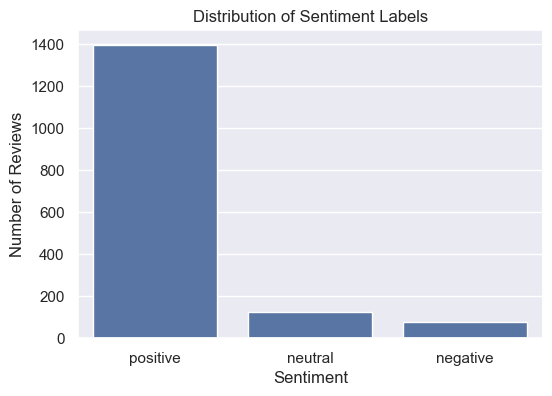

In [141]:

plt.figure(figsize=(6,4),)
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

######

###### Clean the review text

In [142]:

import re

def clean_text(text):
    text = str(text).lower()              
    text = re.sub(r'[^a-z\s]', '', text)  
    return text

df['cleaned_review'] = df['reviews.text'].apply(clean_text)
print(df[['reviews.text', 'cleaned_review']].head())


                                        reviews.text  \
0  I initially had trouble deciding between the p...   
1  Allow me to preface this with a little history...   
2  I am enjoying it so far. Great for reading. Ha...   
3  I bought one of the first Paperwhites and have...   
4  I have to say upfront - I don't like coroporat...   

                                      cleaned_review  
0  i initially had trouble deciding between the p...  
1  allow me to preface this with a little history...  
2  i am enjoying it so far great for reading had ...  
3  i bought one of the first paperwhites and have...  
4  i have to say upfront  i dont like coroporate ...  


######

###### Prepare Features and Labels

In [143]:

X = df['cleaned_review']
y = df['sentiment']


###### Convert Text to Numbers (TF-IDF)

In [144]:
Text = df['reviews.text'][20]
print(Text)

Almost like reading a real book. Don't is crisp, sharp and easy to read. I've held out from buying a reader for years because I could never quite get past the fact it wasn't a book. With this new kindle I don't even notice, I am immediately immersed. Wildly better than I expected.


In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=20) 
X_example = vectorizer.fit_transform([Text])
print(vectorizer.get_feature_names_out())


['better' 'book' 'buying' 'crisp' 'don' 'easy' 'expected' 'fact' 'held'
 'immediately' 'immersed' 'kindle' 'like' 'new' 'notice' 'past' 'quite'
 'read' 'reader' 'reading']


In [146]:
tfidf_vector = pd.DataFrame(X_example.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_vector)

     better      book    buying     crisp       don      easy  expected  \
0  0.196116  0.392232  0.196116  0.196116  0.392232  0.196116  0.196116   

       fact      held  immediately  immersed    kindle      like       new  \
0  0.196116  0.196116     0.196116  0.196116  0.196116  0.196116  0.196116   

     notice      past     quite      read    reader   reading  
0  0.196116  0.196116  0.196116  0.196116  0.196116  0.196116  


In [147]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(X)


###### Split Data into Train and Test

In [160]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [127]:
X_train.shape

(1277, 5000)

In [128]:
X_test.shape

(320, 5000)

In [130]:
y_train.shape

(1277,)

In [131]:
y_test.shape

(320,)

######

#### 2. ML Algorithms Used for Training

###### Logistic Regression

In [161]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg_model = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

accuracy_logreg = round(accuracy_score(y_test, y_pred_logreg) * 100, 2)

print("Accuracy (Logistic Regression): " + str(accuracy_logreg) + " %")


Accuracy (Logistic Regression): 86.25 %


######

###### Naive Bayes 

In [162]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

accuracy_nb = round(accuracy_score(y_test, y_pred_nb) * 100, 2)
print("Accuracy (Multinomial Naive Bayes): " + str(accuracy_nb) + " %")



Accuracy (Multinomial Naive Bayes): 85.0 %


######

###### Support Vector Machine (SVM)

In [163]:

from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

accuracy_svm = round(accuracy_score(y_test, y_pred_svm) * 100, 2)
print("Accuracy (SVM): " + str(accuracy_svm) + " %")


Accuracy (SVM): 86.56 %


######

###### K Nearest Neighbors

In [164]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = round(accuracy_score(y_test, y_pred_knn) * 100, 2)
print("Accuracy (KNN): " + str(accuracy_knn) + " %")

Accuracy (KNN): 85.0 %


######

###### Decision Tree

In [165]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=100, max_depth=20)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

accuracy_dt = round(accuracy_score(y_test, y_pred_dt) * 100, 2)
print("Accuracy (Decision Tree): " + str(accuracy_dt) + " %")


Accuracy (Decision Tree): 84.69 %


######

###### Random Forest 

In [166]:

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
print("Accuracy (Random Forest): " + str(accuracy_rf) + " %")


Accuracy (Random Forest): 86.25 %


###### XGBoost

In [167]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Encode the labels numerically

le = LabelEncoder()
y_encoded = le.fit_transform(y)  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)


xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=100)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = round(accuracy_score(y_test,y_pred_xgb)*100,2)
print("Accuracy (XGBoost): "+str(accuracy_xgb)+" %")

Accuracy (XGBoost): 86.25 %


######

#### 3. Prediction & Analysis

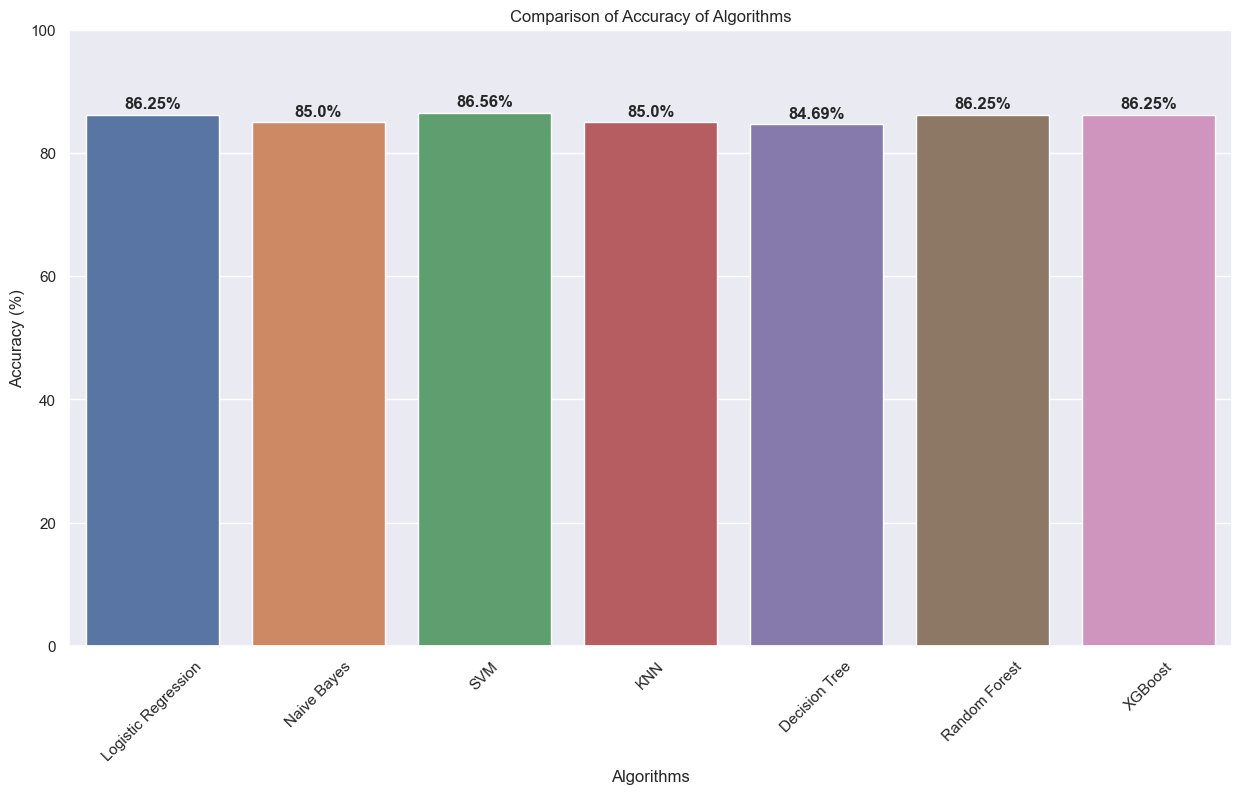

In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_results = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN', 
              'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_logreg,accuracy_nb,accuracy_svm,accuracy_knn,accuracy_dt,accuracy_rf,accuracy_xgb]
})

sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(data=df_results, x='Algorithm', y='Accuracy',hue='Algorithm',legend=False)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Accuracy of Algorithms")
plt.ylim(0, 100)
plt.xticks(rotation=45)

for index, row in df_results.iterrows():
    plt.text(index, row['Accuracy'] + 1, f"{row['Accuracy']}%", ha='center', fontweight='bold')

plt.show()
